## [예] 경기도에서 교통사망사고가 많은 5지역을 분석하여 도식화

(1) 발생지시도가 경기도 데이타셋 필터링

(2) 경기도내에서도 발생지시군구의 그룹핑

(3) 사망자수의 합계로 차트 만들기


In [1]:

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글깨짐처리
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [52]:
# 데이타 읽어오기
data=pd.read_csv('data/accidentdata.csv')  # data.count() # 14624
# (1) 발생지시도가 경기도인 필터링
data.columns  # 발생지시도
data[data['발생지시도'] == '경기'].head()  # 2777 rows

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
1,2012,2012033013,32,주간,금,1,1,0,0,0,...,단일로,기타단일로,화물차,소형,특수차,경형,960392,1924378,127.052937,37.317615
3,2012,2012062814,10,주간,목,1,1,0,0,0,...,단일로,기타단일로,화물차,대형,승용차,소형,992942,1915569,127.420426,37.238956
6,2012,2012053104,17,야간,목,1,2,1,0,0,...,단일로,기타단일로,승용차,소형,건설기계,건설기계,971512,1953274,127.177364,37.578407
13,2012,2012101602,45,야간,화,1,1,0,0,0,...,단일로,기타단일로,승용차,소형,특수차,대형,946961,1921288,126.901626,37.289021
14,2012,2012121404,50,야간,금,1,2,0,1,0,...,단일로,기타단일로,화물차,소형,화물차,대형,942679,1937985,126.852028,37.439262


In [54]:
# (2) 경기도내에서도 발생지시군구의 그룹핑
data2 = data[data['발생지시도'] == '경기']  # 2777 rows
data3 = data2.groupby("발생지시군구")
data3.count().head(10)

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
발생지시군구,,,,,,,,,,,,,,,,,,,,,
가평군,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52
고양시,164,164,164,164,164,164,164,164,164,164,...,164,164,164,164,164,164,164,164,164,164
과천시,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
광명시,40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
광주시,83,83,83,83,83,83,83,83,83,83,...,83,83,83,83,83,83,83,83,83,83
구리시,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
군포시,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
김포시,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90
남양주시,144,144,144,144,144,144,144,144,144,144,...,144,144,144,144,144,144,144,144,144,144


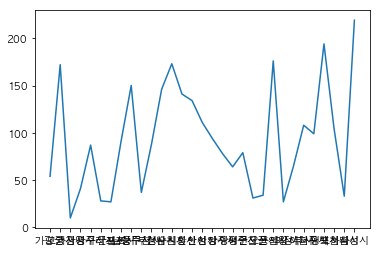

In [41]:
# (3) 사망자수의 합계로 차트 만들기
data4 = data3['사망자수'].sum()
data4
plt.plot(data4)

In [51]:
# (4) 경기도 내에서 사망자 순 5개 지역 추출
data5 = data2.groupby('발생지시군구')['사망자수'].sum().reset_index(name='sum').sort_values(['sum'], ascending=False)
data5[:6]

,발생지시군구,sum
30,화성시,219
27,평택시,194
22,용인시,176
12,수원시,173
1,고양시,172
8,남양주시,150
